# 12.05 HTTP test

In [1]:
import os.path

import requests #Import HTTPS client package

In [2]:
# tiff path
tiff_path = "/media/ibrahim/Extended Storage/cloud/Internship/shapiro/cell_tinder/exemplar-001_Ch1_DAPI (1).tif"

In [3]:
# Feed tiff path to server
content = {"path": tiff_path}
endpoint = "http://127.0.0.1:5000//v1//tiff_img"

try: 
    requests.post(endpoint, data=content)
    print("Successfully sent data")
except Exception as e:
    print("Got the following problem here: {}".format(e))

Got the following problem here: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: //v1//tiff_img (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x764cfd75a850>: Failed to establish a new connection: [Errno 111] Connection refused'))


In [4]:
# Recieve processed data from server
endpoint = "http://127.0.0.1:5000//v1//tiff_img"

try: 
    data = requests.get(endpoint)
    print("Successfully Recieved data")
except Exception as e:
    print("Got the following problem here: {}".format(e))

Got the following problem here: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: //v1//tiff_img (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x764cfd7614d0>: Failed to establish a new connection: [Errno 111] Connection refused'))


In [5]:
# Display recieved data

import matplotlib.pyplot as plt
import numpy as np

data = data.json()
# Problems showing rgb data with plt, so use grayscale channel
plt.imshow(np.array(data["img"])[...,-1])
print("Shape and dtype of image: {} and {}".format(data["shape"], data["dtype"]))

NameError: name 'data' is not defined

# Check Flatten operation to confirm order of 

In [2]:
import numpy as np

array = np.array([[[1,2,3,4,5], [3,3,3,3,3]], [[4,4,4,4,4], [5,5,5,5,5]], [[6,6,6,6,6], [7,7,7,7,7]]])

print(array.flatten())

[1 2 3 4 5 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7 7 7 7]


In [4]:
import python_codes.unity_functions as uf
import os
img = uf.fluorescent_channel2rgb(r"/media/ibrahim/Extended Storage/cloud/Internship/IPBM/well_G_1_hela_gfp_hoechst.tif")

print(img[0][0].shape)

(2, 1024, 1024)
Shape: (1024, 1024, 2)
Length 1
(1024, 1024, 2)


In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_c1 = (img[0][:3]).astype(np.uint16)

NameError: name 'img' is not defined

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

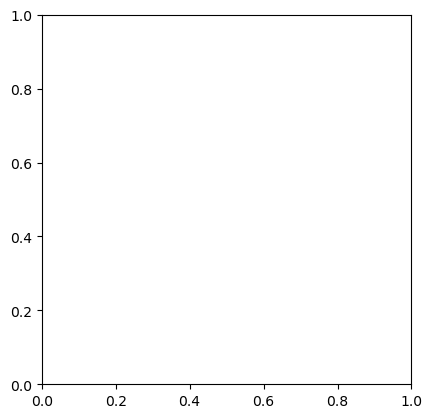

In [5]:
plt.imshow(img)

# Demonstrate uint8 loss of info

(3138, 2509)
Shape: (3138, 2509, 3)
Length 1


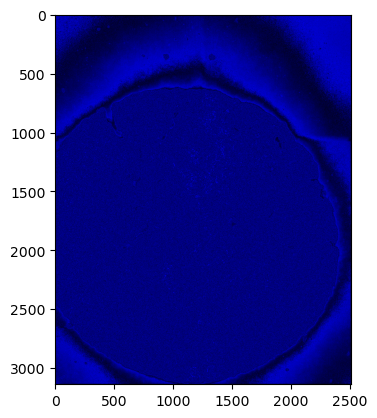

In [13]:
data = uf.fluorescent_channel2rgb("/media/ibrahim/Extended Storage/cloud/Internship/shapiro/exemplar-001_Ch1_DAPI.tif")
# Problems showing rgb data with plt, so use grayscale channel
plt.imshow(np.array(data[0][0]).astype(np.uint8))

(3138, 2509)
Shape: (3138, 2509, 3)
Length 1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


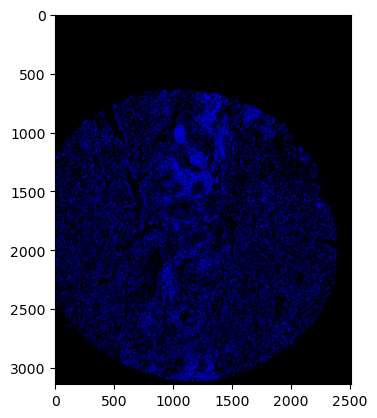

In [14]:
data = uf.fluorescent_channel2rgb("/media/ibrahim/Extended Storage/cloud/Internship/shapiro/exemplar-001_Ch1_DAPI.tif")
# Problems showing rgb data with plt, so use grayscale channel

#Min max norm
v = np.array(data[0][0])
img_norm = (v - v.min()) / (v.max() - v.min())
img_norm = img_norm * 256

plt.imshow(img_norm.astype(int))